## Observations and Insights

## Dependencies and starter code

In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
%matplotlib inline
# Study data files

In [139]:
mouse_metadata = "data/Mouse_metadata.csv"

# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata)

#print results
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [140]:
study_results = "data/Study_results.csv"

# Read the study_results
study_results = pd.read_csv(study_results)

#print 
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [186]:
# Combine the data into a single dataset
table_merger = pd.merge(mouse_metadata, study_results, on= "Mouse ID")
table_merger

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [142]:
#group by Regimen and aggregate tumor volume...find mean,median etc
grouped = table_merger.groupby(['Drug Regimen'])

grouped.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [73]:
dropped = table_merger.loc[:, ["Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"]]
dropped.head()
  

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,21,16,0,45.000000,0
1,21,16,5,38.825898,0
2,21,16,10,35.014271,1
3,21,16,15,34.223992,1
4,21,16,20,32.997729,1


In [76]:
tumor_mean = table_merger.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
tumor_mean.head()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [77]:
tumor_mean2 = table_merger.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
tumor_mean2.head()

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Name: Tumor Volume (mm3), dtype: float64

In [86]:
var_numpy = table_merger.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
var_numpy.head()
#print(f"The population variance using the NumPy module is {var_numpy}")

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Name: Tumor Volume (mm3), dtype: float64

In [87]:
sd_numpy = table_merger.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
sd_numpy.head()
#print(f"The population standard deviation using the NumPy module is {sd_numpy}")

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Name: Tumor Volume (mm3), dtype: float64

In [90]:
#sem
sem_numpy = table_merger.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()
sem_numpy.head()

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Name: Tumor Volume (mm3), dtype: float64

In [93]:
#summary table

summary =  pd.DataFrame({"Mean":tumor_mean, "Median":tumor_mean2,
                          "Variance": var_numpy, "SD": sd_numpy, "SEM": sem_numpy})
                    
summary.head()

,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

In [131]:
%matplotlib inline

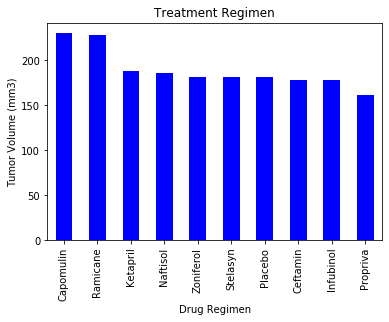

In [134]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
Drug_chart = table_merger["Drug Regimen"].value_counts()
Drug_chart= Drug_chart.plot(kind="bar",facecolor="blue")

plt.title("Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

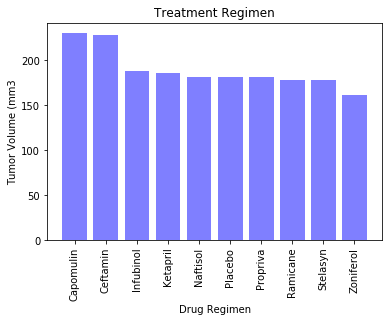

In [194]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
Drug_chart = table_merger['Drug Regimen'].value_counts()


x=Drug_chart.index.sort_values()
plt.bar(x, Drug_chart,color='blue', alpha=.5, align= "center")
plt.xticks(rotation=90)
plt.title("Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3")
plt.show()

## Pie plots

Text(0, 0.5, 'Sex')

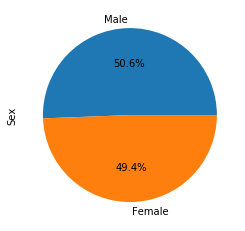

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
dist_sex = table_merger["Sex"].value_counts()

pieplot = dist_sex.plot.pie(autopct="%1.1f%%")
pieplot.set_ylabel("Sex")

In [149]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = table_merger.groupby('Sex')

sex_pie = gender.plot(kind="pie", y= gender, title=("sex of mice"))
sex_pie.set_ylabel("table_merger")

plt.show()
#plt.tight_layout()
p#lt.axis("equal")

ValueError: cannot copy sequence with size 935 to array axis with dimension 8

## Quartiles, outliers and boxplots

In [182]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Calculate the IQR and quantitatively determine if there are any potential outliers.
Mouse = table_merger.groupby(['Drug Regimen','Mouse ID']).last()
Mouse.reset_index(level=0, inplace = True)
Mouse

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
b128,Capomulin,Female,9,22,45,38.982878,2
b742,Capomulin,Male,7,21,45,38.939633,0
f966,Capomulin,Male,16,17,20,30.485985,0
g288,Capomulin,Male,3,19,45,37.074024,1
g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...
q633,Zoniferol,Male,12,25,45,70.827796,2
s337,Zoniferol,Male,14,27,45,62.109651,4
w140,Zoniferol,Female,19,30,5,47.717952,0


In [180]:
#capomulin
Drug_capo = Mouse[Mouse['Drug Regimen']=="Drug_capo"]
Tumor_capo = Drug_capo['Tumor Volume (mm3)']
Tumor_capo

Quartiles = Tumor_capo.quantile([.25,.5,.75])
Lquartile = Quartiles[0.25]
Uquartile = Quartiles[0.75]
iqr = Lquartile-Uquartile

print(f"The lower quartile of Capomulin  is: {Lquartile}")
print(f"The upper quartile of Capomulin is: {Uquartile}")
print(f"The interquartile range of Capomulin  is: {iqr}")
print(f"The median of Capomulin  is: {Quartiles[0.5]} ")

Lower_bound = Lquartile - (1.5*iqr)
Upper_bound = Uquartile + (1.5*iqr)
print(f"Values below {Lower_bound} could be outliers.")
print(f"Values above {Upper_bound} could be outliers.")

The lower quartile of Capomulin  is: nan
The upper quartile of Capomulin is: nan
The interquartile range of Capomulin  is: nan
The median of Capomulin  is: nan 
Values below nan could be outliers.
Values above nan could be outliers.


In [178]:
#Ramicane
Drug_rami = Mouse[Mouse['Drug Regimen'] == "Drug_rami"]
Tumor_rami = Drug_rami['Tumor Volume (mm3)']
Tumor_rami

quartiles = Tumor_rami.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin  is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin  is: {iqr}")
print(f"The median of Capomulin  is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin  is: nan
The upper quartile of Capomulin is: nan
The interquartile range of Capomulin  is: nan
The median of Capomulin  is: nan 
Values below nan could be outliers.
Values above nan could be outliers.


In [183]:
#Infubinol
Drug_info = Mouse[Mouse['Drug Regimen'] == "Drug_info"]
Tumor_info = Drug_info['Tumor Volume (mm3)']
Tumor_info

quartiles = Tumor_info.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin  is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin  is: {iqr}")
print(f"The median of Capomulin  is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin  is: nan
The upper quartile of Capomulin is: nan
The interquartile range of Capomulin  is: nan
The median of Capomulin  is: nan 
Values below nan could be outliers.
Values above nan could be outliers.


In [179]:
#ceftamin
Drug_ceft = Mouse[Mouse['Drug Regimen'] == "Drug_ceft"]
Tumor_ceft = Drug_ceft['Tumor Volume (mm3)']
Tumor_ceft

quartiles = Tumor_ceft.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin  is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin  is: {iqr}")
print(f"The median of Capomulin  is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin  is: nan
The upper quartile of Capomulin is: nan
The interquartile range of Capomulin  is: nan
The median of Capomulin  is: nan 
Values below nan could be outliers.
Values above nan could be outliers.


ValueError: cannot copy sequence with size 0 to array axis with dimension 7

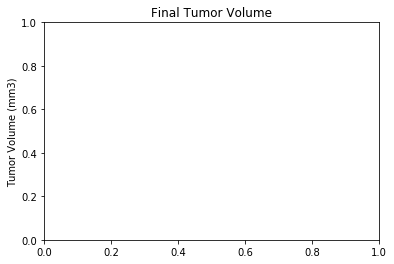

In [184]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Tumor_drug = [Drug_capo, Drug_rami, Drug_info, Drug_ceft]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Tumor_drug)
plt.show()

## Line and scatter plots

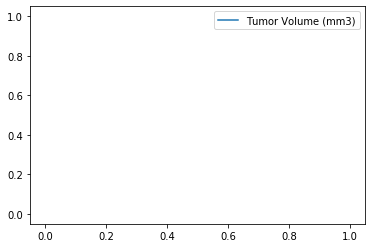

In [189]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin= Mouse[Mouse['Drug Regimen']=="Drug_capo"]
Tumor_capo = capomulin['Tumor Volume (mm3)']


rat = table_merger.groupby('Mouse ID')


cap_mouse = table_merger[table_merger['Mouse ID']=='1509']
cap_mouse = cap_mouse[['Mouse ID','Tumor Volume (mm3)']]

cap_mouse.plot(x_compat=True); plt.legend(loc='best')

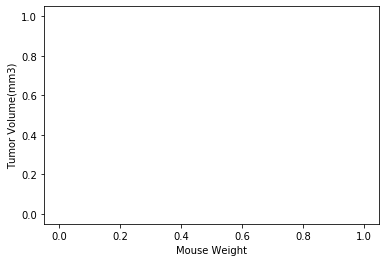

In [190]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

weight = Drug_capo['Weight (g)']
weight

plt.scatter(weight, Tumor_capo)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume(mm3)')
plt.show()

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and 
#average tumor volume for the Capomulin regimen
